# Load Data

In [1]:
from LoadData import outcomes_df, projects_df, donors_choose_df

'donors_choose_df' is merged dataframe including: 
- the target variable, 'fully_funded', from 'Outcomes' 
- full 'Projects' dataframe
- indexed by 'projectid'

#### Load functions and global variables:

In [2]:
import CleaningFunctions as cf
import ExplorationFunctions as ef
import LoadData as ld
from Variables import *

#### Required modules and connections:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import datetime as dt

# Initial cleaning

#### Remove lat/long and ID variables, change t/f to 1/0, convert date_posted to datetime impute the mean for NaN:

In [4]:
remove_from_projects = GEO_VARIABLES + ID_VARIABLES + IDX
keep_vars = [x for x in projects_df.columns if x not in remove_from_projects]
labeled_df = donors_choose_df[keep_vars + TARGET_VARIABLES]
labeled_df['date_posted'] = pd.to_datetime(labeled_df['date_posted'])
labeled_df = cf.change_to_1_0(labeled_df)
labeled_df = cf.impute_mean(labeled_df, given_cols=CONTINUOUS_VARIABLES)

/Users/akoko0530/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/akoko0530/Documents/GitHub/MachineLearning_CAPP30254/Homework_3/CleaningFunctions.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/akoko0530/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

# Exploration

In [5]:
labeled_df.describe()

,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,fully_funded
count,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000
mean,56301.763713,0.094444,0.085057,0.049078,0.011788,0.006637,0.006116,0.049087,0.010211,32.220311,531.372372,625.143964,94.187169,0.317026,0.044279,0.701394
std,31043.523511,0.292446,0.278967,0.216032,0.107932,0.081199,0.077968,0.216049,0.100532,2.484309,844.069364,993.022780,156.964955,0.465318,0.205713,0.457647
min,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,37.030000,43.560000,1.000000,0.000000,0.000000,0.000000
25%,29388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,288.750000,339.710000,23.000000,0.000000,0.000000,0.000000
50%,60613.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,427.270000,502.670000,31.000000,0.000000,0.000000,1.000000
75%,90007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,606.720000,713.790000,100.000000,1.000000,0.000000,1.000000
max,99926.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,139725.410000,164382.840000,12143.000000,1.000000,1.000000,1.000000


In [6]:
cf.has_na(labeled_df)

[('school_metro', 43021),
 ('school_district', 429),
 ('primary_focus_subject', 35),
 ('primary_focus_area', 35),
 ('secondary_focus_subject', 116086),
 ('secondary_focus_area', 116086),
 ('resource_type', 42),
 ('grade_level', 6)]

- Lots of missing observations from school_metro, secondary_focus_subject, secondary_focus_area

In [7]:
#Split into funded and nonfunded tables
funded_df = labeled_df[labeled_df['fully_funded']==1]
nonfunded_df = labeled_df[labeled_df['fully_funded']==0]

In [8]:
nonfunded_df.describe()

,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,fully_funded
count,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.000000,105453.0
mean,56110.067983,0.083734,0.077911,0.049899,0.008857,0.005064,0.004741,0.030525,0.007245,32.250197,647.058084,761.244744,97.940965,0.234825,0.028828,0.0
std,29949.240035,0.276990,0.268034,0.217737,0.093695,0.070981,0.068695,0.172029,0.084809,2.487500,991.632938,1166.627001,159.095611,0.423891,0.167324,0.0
min,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,45.150000,53.120000,1.000000,0.000000,0.000000,0.0
25%,29801.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,369.540000,434.750000,22.000000,0.000000,0.000000,0.0
50%,60053.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,481.120000,566.020000,31.000000,0.000000,0.000000,0.0
75%,89101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,732.950000,862.290000,100.000000,0.000000,0.000000,0.0
max,99901.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,63530.690000,74741.990000,999.000000,1.000000,1.000000,0.0


In [9]:
funded_df.describe()

,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,fully_funded
count,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.000000,247698.0
mean,56383.374747,0.099004,0.088099,0.048729,0.013036,0.007307,0.006702,0.056989,0.011474,32.207587,482.121246,567.201488,92.589057,0.352021,0.050856,1.0
std,31497.564702,0.298667,0.283440,0.215301,0.113429,0.085170,0.081589,0.231822,0.106499,2.482845,767.469691,902.905514,156.021954,0.477602,0.219705,0.0
min,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,37.030000,43.560000,1.000000,0.000000,0.000000,1.0
25%,28752.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,257.920000,303.440000,23.000000,0.000000,0.000000,1.0
50%,60620.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,395.530000,465.330000,30.000000,0.000000,0.000000,1.0
75%,90022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,541.747500,637.347500,100.000000,1.000000,0.000000,1.0
max,99926.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,139725.410000,164382.840000,12143.000000,1.000000,1.000000,1.0


Variables with notable difference in mean, between funded and non-funded:
- total_price_excluding_optional_support
- total_price_including_optional_support

### Top 5 results by count of each attribute, given that project was fully funded:

In [10]:
cols_of_interst = list(funded_df.columns)[:-2]
for col in cols_of_interst:
    print("Top 5 ", col, ":")
    print(ef.find_most_funded(funded_df, col, 'fully_funded', 5), '\n')

Top 5  school_city :
fully_funded  school_city
1             Los Angeles    10797
              Chicago         7633
              Brooklyn        5749
              Bronx           4666
              Houston         4500
Name: school_city, dtype: int64 

Top 5  school_state :
fully_funded  school_state
1             CA              55816
              NY              20677
              TX              15310
              FL              14411
              IL              11639
Name: school_state, dtype: int64 

Top 5  school_zip :
fully_funded  school_zip
1             90011.0       832
              73160.0       776
              64801.0       679
              91340.0       664
              10451.0       640
Name: school_zip, dtype: int64 

Top 5  school_metro :
fully_funded  school_metro
1             urban           130755
              suburban         62593
              rural            25781
Name: school_metro, dtype: int64 

Top 5  school_district :
fully_funded  school_d

Variables with proportionally high counts: 
- urban schools (school_metro)
- non-charter schools (school_charter)
- non-magnet schools (school_magnet)
- schools that were not-year-round (school_year_round)
- not school_nlns, school_kipps
- teacher prefix = Mrs. (teacher_prefix)
- primary focus subject = Literacy (primary_focus_subject)
- primary focus area = Literacy & Language (primary_focus_area)
- poverty level = highest (poverty_level)
- not eligible for double your impact match (eligible_double_your_impact_match)
- not eligible for almost home match (eligible_almost_home_match)

### Correlation heatmap:

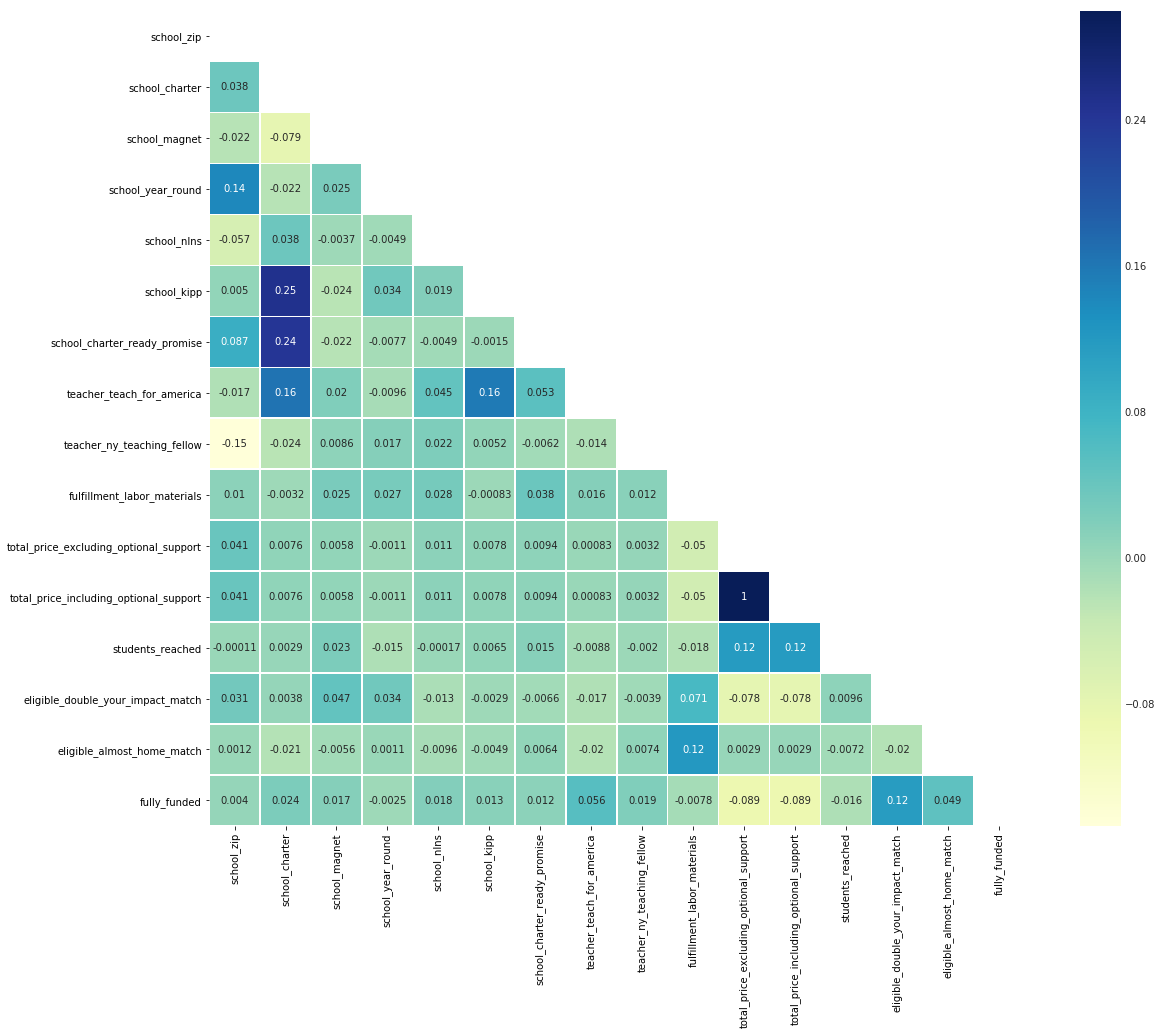

In [11]:
ef.heatmap_correlation(labeled_df)

Of the variables, fully_funded has highest correlation with eligible_double_your_impact_match (correlation = 0.12), but would need the p-value to know more about the strength of this statistic.

### Percentage breakouts of somes variables:

In [12]:
import os, sys
import numpy as np
import pandas as pd

from IPython.display import display

from plotly import __version__
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.plotly as py
import plotly.graph_objs as go

import cufflinks as cf

# run at the start of every ipython notebook to use plotly.offline
# this injects the plotly.js source files into the notebook
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [13]:
look_at = ['school_metro',
             'teacher_prefix',
             'primary_focus_area',
             'resource_type',
             'poverty_level', 
             'grade_level',
             'fulfillment_labor_materials']
for col in look_at:
    ef.donut_plot(labeled_df,col)

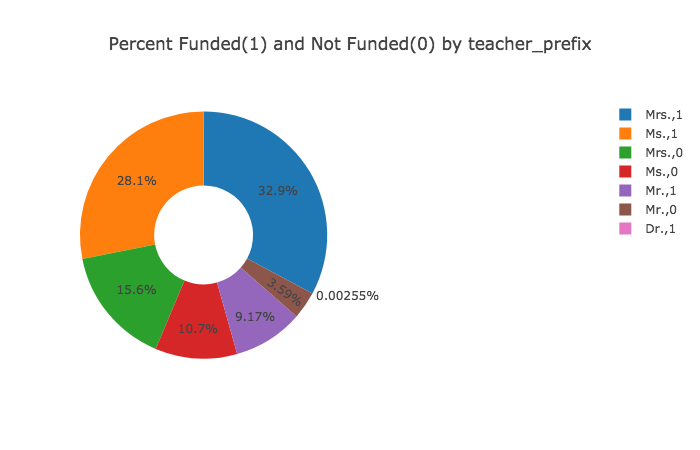

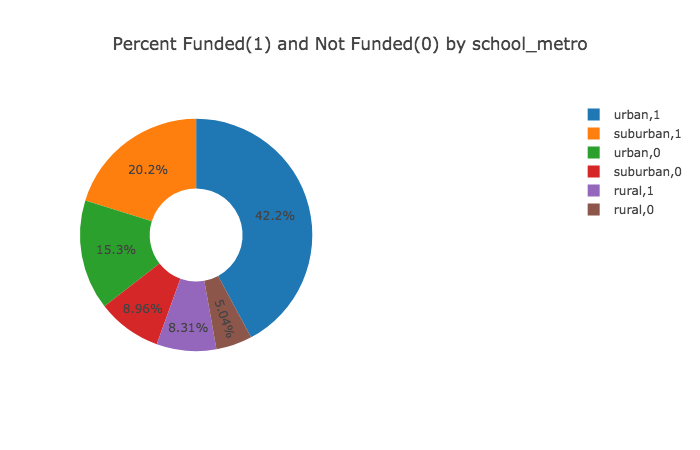

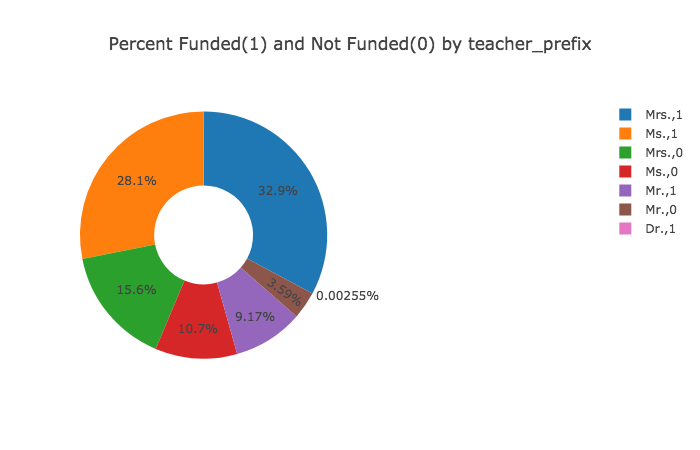

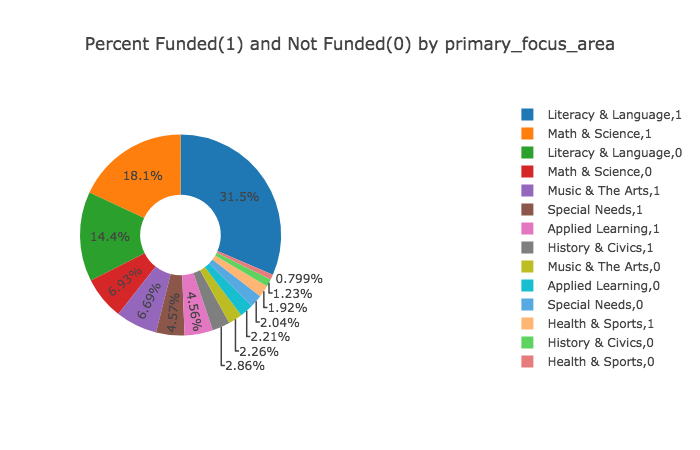

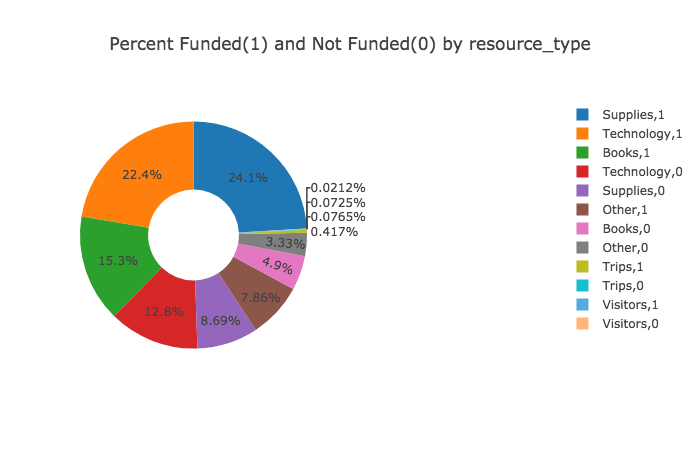

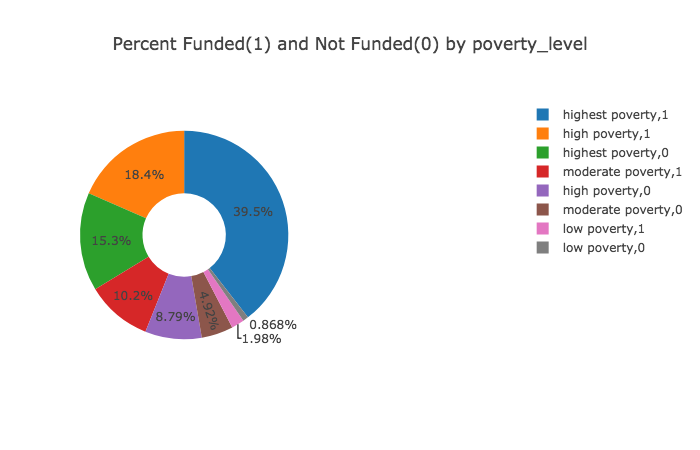

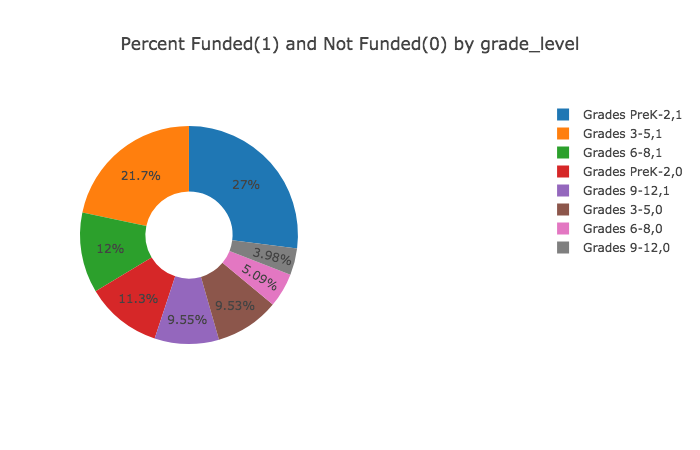

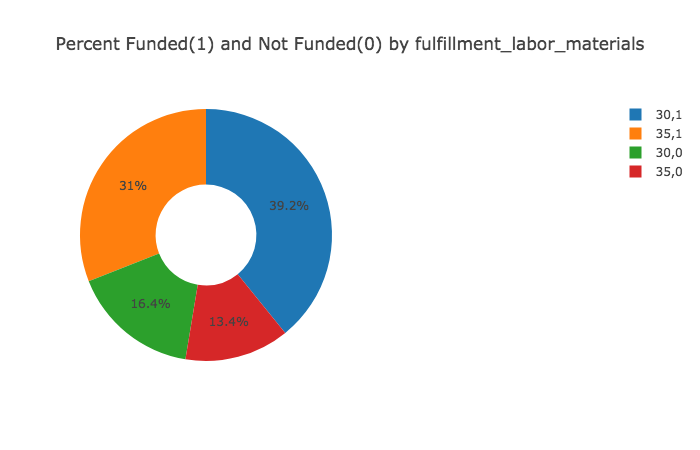

High percentage of funding for:
- urban schools
- teacher prefix = 'Mrs.'
- primary focus area = Literacy & Language
- resource type = supplies
- those categorized as highest poverty
- grade level = PreK-2

### Mean fully_funded over time:

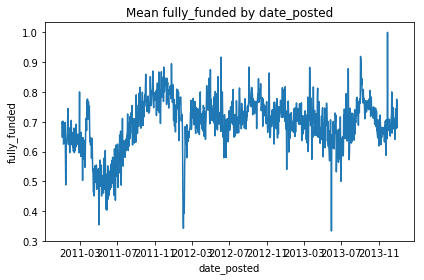

In [14]:
ef.mean_Y_by_X(labeled_df, 'date_posted', 'fully_funded')

Projects approved for funding for dipped in early 2011, and has been on a very shallow decline since a quick dip in 2012.

### Mean of dummy variables over time:

In [15]:
year_2011 = labeled_df[labeled_df['date_posted'].dt.year == 2011]
year_2012 = labeled_df[labeled_df['date_posted'].dt.year == 2012]
year_2013 = labeled_df[labeled_df['date_posted'].dt.year == 2013]

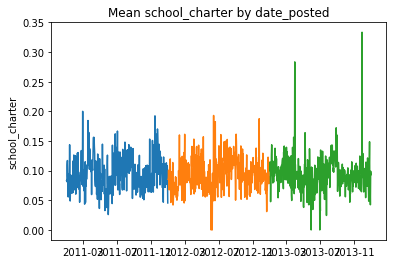

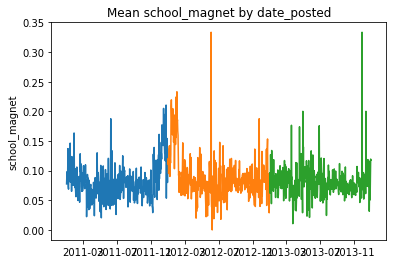

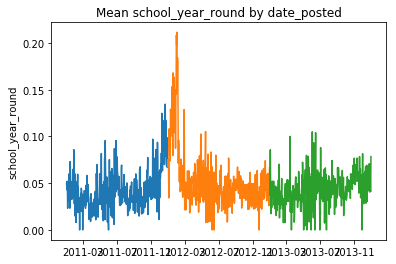

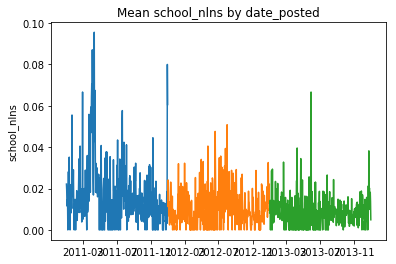

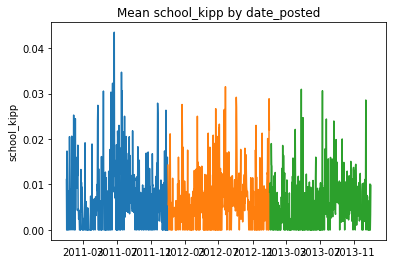

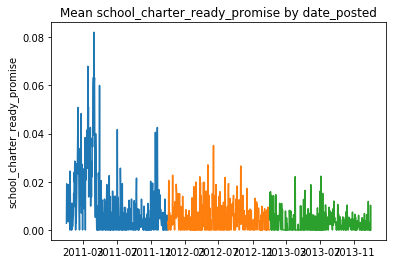

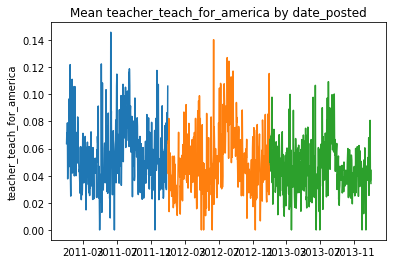

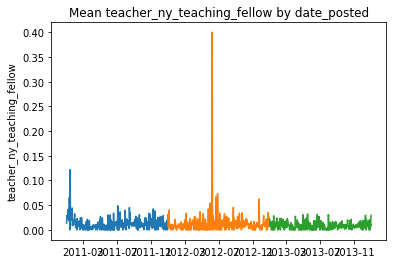

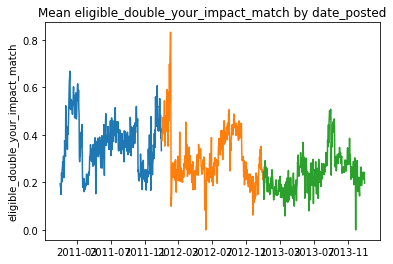

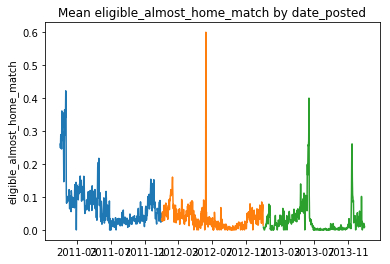

In [16]:
for col in DUMMY_VARIABLES_T_F:
    ef.graph_mean_over_time(year_2011, year_2012, year_2013, 
                        'date_posted', col)

- mean school_nlns over time is right skewed
- mean school_charter_ready_promise over time is right skewed
- mean of eligibile_double_your_impact_match oscillates and decreases over time

### Mean of continuous variables over time:

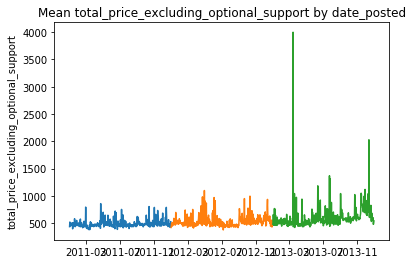

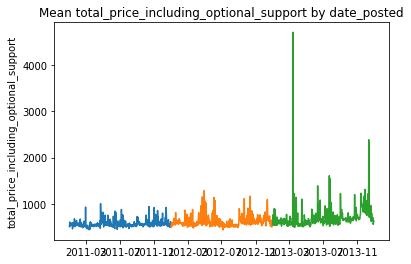

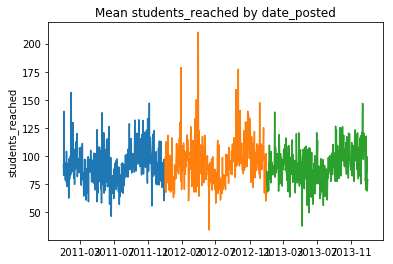

In [17]:
for col in CONTINUOUS_VARIABLES:
    ef.graph_mean_over_time(year_2011, year_2012, year_2013, 
                        'date_posted', col)

### Histogram of continuous variables:

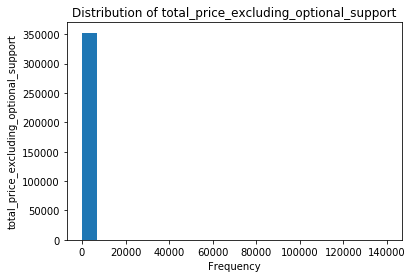

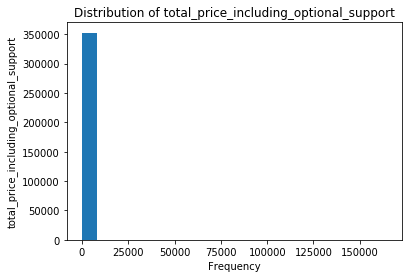

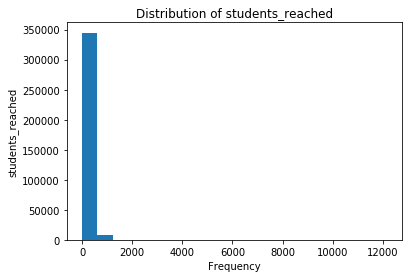

In [18]:
for col in CONTINUOUS_VARIABLES:
    ef.histogram_plot(labeled_df, col)

### Histogram of log continuous variables:

/Users/akoko0530/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



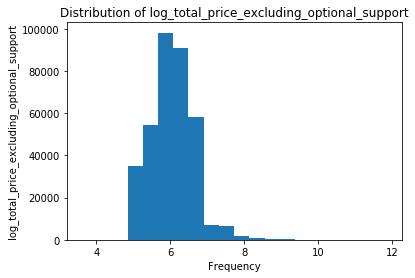

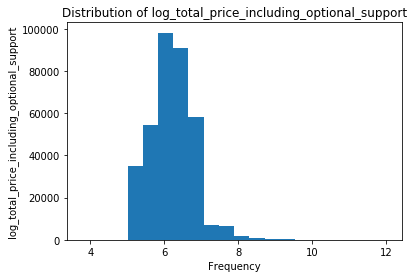

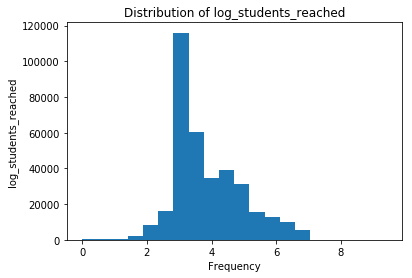

In [19]:
for col in CONTINUOUS_VARIABLES:
    new_col = "log_" + col
    labeled_df[new_col] = np.log(labeled_df[col])
    ef.histogram_plot(labeled_df, new_col)